## As an aspiring data scientist, you are expected to manage a **whole End-to-End process** of data science, starting from defining a question, gathering relavent data... and finally making deployment

## Let's play a role game: 
## we are a biologist and statistician, classifying organisms like plants and animals is one of our main job


## Let's define the question to be identifying iris flowers, and that we can get easily collected data such as length and width of iris flowers.

### By our scientific research, we finally confirm that the following length and width can help us identify the flower type with high accuracy

1. sepal length in cm 
2. sepal width in cm 
3. petal length in cm 
4. petal width in cm 

### The flower types are
* Iris Setosa 
* Iris Versicolour 
* Iris Virginica


**Remarks: Defining question phase **

### The above research cycle can be tricky and sometimes depends on the sense of the domain knowledge you are working at

### As a beginning, we can get the dataset(which can take long time and efforts to finalize in practice) from a repository

### https://archive.ics.uci.edu/ml/datasets/iris


** Remarks: Collecting data phase **

In [5]:
import pandas as pd

df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data",header = None)

df.head(10)

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


### Having reading the data into python environment, it seems that we have to check out what is inside the dataset.
### How many records inside? What is the column name? Do we have a summary for the dataset? ...

### For reliable data sources, there should be credible reference file that describe the dataset, reference for this dataset can be seen below
### https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.names


** Remarks: Data cleaning phase  ** 

In [7]:
# change the column name by google search "change column name pandas" and check for stackoverflow reference

# https://stackoverflow.com/questions/11346283/renaming-columns-in-pandas

names = ['SepalLength', 'SepalWidth','PetalLength','PetalWidth', 'FlowerType']

df.columns = names

df.tail(3)

,SepalLength,SepalWidth,PetalLength,PetalWidth,FlowerType
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [8]:
df.shape  # the shape of the dataframe

(150, 5)

In [9]:
df.info  # more detailed information

<bound method DataFrame.info of      SepalLength  SepalWidth  PetalLength  PetalWidth      FlowerType
0            5.1         3.5          1.4         0.2     Iris-setosa
1            4.9         3.0          1.4         0.2     Iris-setosa
2            4.7         3.2          1.3         0.2     Iris-setosa
3            4.6         3.1          1.5         0.2     Iris-setosa
4            5.0         3.6          1.4         0.2     Iris-setosa
5            5.4         3.9          1.7         0.4     Iris-setosa
6            4.6         3.4          1.4         0.3     Iris-setosa
7            5.0         3.4          1.5         0.2     Iris-setosa
8            4.4         2.9          1.4         0.2     Iris-setosa
9            4.9         3.1          1.5         0.1     Iris-setosa
10           5.4         3.7          1.5         0.2     Iris-setosa
11           4.8         3.4          1.6         0.2     Iris-setosa
12           4.8         3.0          1.4         0.1     

In [11]:
df.describe(include = 'all') 

# with pandas, there is a describe method that show simple statistical summary
# Petal Width has the shortest mean, while Sepal length has the longest length
# can we further break down for different flower type? From pandas tutorial, if you play around and remember, groupby is nice method

df.groupby('FlowerType').mean() # can you spot any patterns in the following figure?

,SepalLength,SepalWidth,PetalLength,PetalWidth
FlowerType,,,,
Iris-setosa,5.006,3.418,1.464,0.244
Iris-versicolor,5.936,2.770,4.260,1.326
Iris-virginica,6.588,2.974,5.552,2.026


In [14]:
df.groupby('FlowerType').median()

,SepalLength,SepalWidth,PetalLength,PetalWidth
FlowerType,,,,
Iris-setosa,5.0,3.4,1.50,0.2
Iris-versicolor,5.9,2.8,4.35,1.3
Iris-virginica,6.5,3.0,5.55,2.0


In [13]:
# ah, once more important data cleaning, any missing values in the dataset?
# check highest vote in stackoverflow and look for suggested solution
# https://stackoverflow.com/questions/29530232/python-pandas-check-if-any-value-is-nan-in-dataframe

df.isnull().values.any()  # nice to see no missing values

False

### Okay, we can now a bit comfortable in using the pandas data frame. 
### Next, do we have some graphics that can help us visually understand the dataset?

### We can make use of data visualization techniques, most oftenly scientific plots like histogram, boxplot, scatterplots... to see any trends or patterns


** Remarks: Exploratory Data Analysis (EDA) **

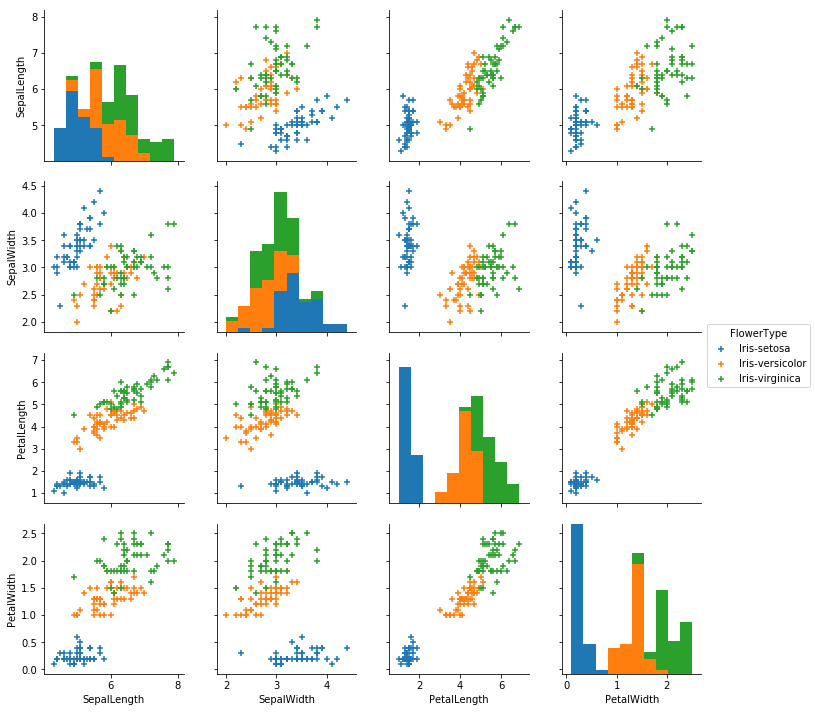

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# we can make use of some blogs on data visualization to displays the dataset
# https://www.kaggle.com/jchen2186/machine-learning-with-iris-dataset
# this is the scatter plot as well as histogram in seaborn library

g = sns.pairplot(df, hue='FlowerType', markers='+')
plt.show()


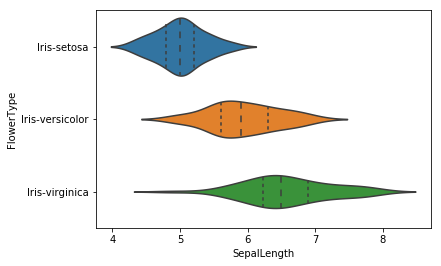

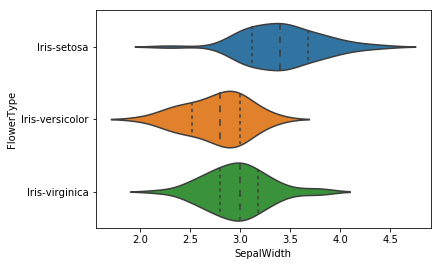

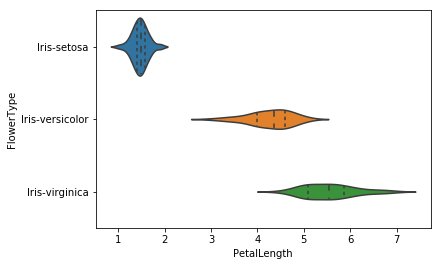

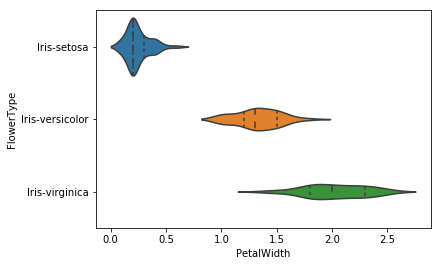

In [21]:
# violinplot is a suitable plot to see how numerical data are distributed

g = sns.violinplot(y='FlowerType', x='SepalLength', data=df, inner='quartile')
plt.show()
g = sns.violinplot(y='FlowerType', x='SepalWidth', data=df, inner='quartile')
plt.show()
g = sns.violinplot(y='FlowerType', x='PetalLength', data=df, inner='quartile')
plt.show()
g = sns.violinplot(y='FlowerType', x='PetalWidth', data=df, inner='quartile')
plt.show()

### We see that Iris-setosa is a really differentiated flower type from other two flower types




### What's next? We can then make use of machine learning algorithms or models to automatically classify the flower type
### There are some usual practice for the machine learning phase, such as train-test split and cross validation.
### To perform machine learning, we have to be clear we are in which category supervised machine learning, unsupervised machine learning, reinforcement machine learning

### The target variable (categorical) in flower type classification problem is under supervised machine learning 


** Remarks: machine learning phase **


In [22]:
# by checking out the official website we learn that there are some models can be used
# http://scikit-learn.org/stable/supervised_learning.html#supervised-learning

from sklearn import metrics # getting metrics for evaluation
from sklearn.linear_model import LogisticRegression # using linear model
from sklearn.neighbors import KNeighborsClassifier # using KNN algorithm
from sklearn.model_selection import train_test_split # training and testing splite


In [34]:
# seperate the features/factors/variables from the target/output

X = df.drop(['FlowerType'], axis=1)
y = df['FlowerType']

X.info


<bound method DataFrame.info of      SepalLength  SepalWidth  PetalLength  PetalWidth
0            5.1         3.5          1.4         0.2
1            4.9         3.0          1.4         0.2
2            4.7         3.2          1.3         0.2
3            4.6         3.1          1.5         0.2
4            5.0         3.6          1.4         0.2
5            5.4         3.9          1.7         0.4
6            4.6         3.4          1.4         0.3
7            5.0         3.4          1.5         0.2
8            4.4         2.9          1.4         0.2
9            4.9         3.1          1.5         0.1
10           5.4         3.7          1.5         0.2
11           4.8         3.4          1.6         0.2
12           4.8         3.0          1.4         0.1
13           4.3         3.0          1.1         0.1
14           5.8         4.0          1.2         0.2
15           5.7         4.4          1.5         0.4
16           5.4         3.9          1.3         

In [35]:
y.describe()

count             150
unique              3
top       Iris-setosa
freq               50
Name: FlowerType, dtype: object

In [40]:
# using linear model to make classification

modellogit = LogisticRegression()
modellogit = modellogit.fit(X,y)

print(modellogit)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


In [41]:
y_pred = modellogit.predict(X)

In [44]:
print (y_pred,y)

['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor

In [53]:
# check for the accuracy, achieving 96% correctly classified

print(metrics.accuracy_score(y, y_pred))


0.96


In [57]:
# can use the metrics method in sklearn to learn more about the accuracy
# http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
from sklearn.metrics import confusion_matrix
confusion_matrix(y, y_pred, labels = ['Iris-setosa','Iris-versicolor','Iris-virginica'] )

array([[50,  0,  0],
       [ 0, 45,  5],
       [ 0,  1, 49]])

In [58]:
confusion_matrix(y, y_pred, labels = y.unique())  # a more easier way

array([[50,  0,  0],
       [ 0, 45,  5],
       [ 0,  1, 49]])

In [61]:
# using KNN algorithm to make classification

modelknn = KNeighborsClassifier()
modelknn = modelknn.fit(X,y)

y_pred2 = modelknn.predict(X)

In [62]:
print(metrics.accuracy_score(y, y_pred2)) # again achieving 96% accuracy 

0.966666666667


In [63]:
confusion_matrix(y, y_pred2, labels = y.unique())  # a more easier way

array([[50,  0,  0],
       [ 0, 47,  3],
       [ 0,  2, 48]])

### Finally, we can make deployment by allowing other non technical users to understand the result properly

### We can print out a csv file that contain machine learning results for other to take reference



In [68]:
df['logit_pred'] = y_pred
df['knn_pred'] = y_pred2

In [76]:
df.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,FlowerType,logit_pred,knn_pred
0,5.1,3.5,1.4,0.2,Iris-setosa,Iris-setosa,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa,Iris-setosa,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa,Iris-setosa,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa,Iris-setosa,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa,Iris-setosa,Iris-setosa


In [77]:
# sending the dataframe out of Python

df.to_csv('prediction_result.csv')